In [42]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df= pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('****'*20)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
********************************************************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
********************************************************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
********************************************************************************
default
no     44396
yes      815
Name: count, dtype: int64
********************************************************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
**************************************************************

In [7]:
df = pd.get_dummies(df, columns=['job'])

In [8]:
df = pd.get_dummies(df, columns=['marital'])

In [9]:
df = pd.get_dummies(df, columns=['education'])

In [10]:
df = pd.get_dummies(df, columns=['default'])

In [11]:
df=df.drop(["default_no"],axis=1)

In [12]:
df = pd.get_dummies(df, columns=['housing'])

In [13]:
df=df.drop(["housing_no"],axis=1)

In [14]:
df = pd.get_dummies(df, columns=['loan'])

In [15]:
df=df.drop(["loan_no"],axis=1)

In [16]:
df = pd.get_dummies(df, columns=['contact'])

In [17]:
df = pd.get_dummies(df, columns=['month'])

In [18]:
df = pd.get_dummies(df, columns=['poutcome'])

In [19]:
df = pd.get_dummies(df, columns=['y'])

In [20]:
df=df.drop(["y_no"],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  bool 
 8   job_blue-collar      45211 non-null  bool 
 9   job_entrepreneur     45211 non-null  bool 
 10  job_housemaid        45211 non-null  bool 
 11  job_management       45211 non-null  bool 
 12  job_retired          45211 non-null  bool 
 13  job_self-employed    45211 non-null  bool 
 14  job_services         45211 non-null  bool 
 15  job_student          45211 non-null  bool 
 16  job_technician       4

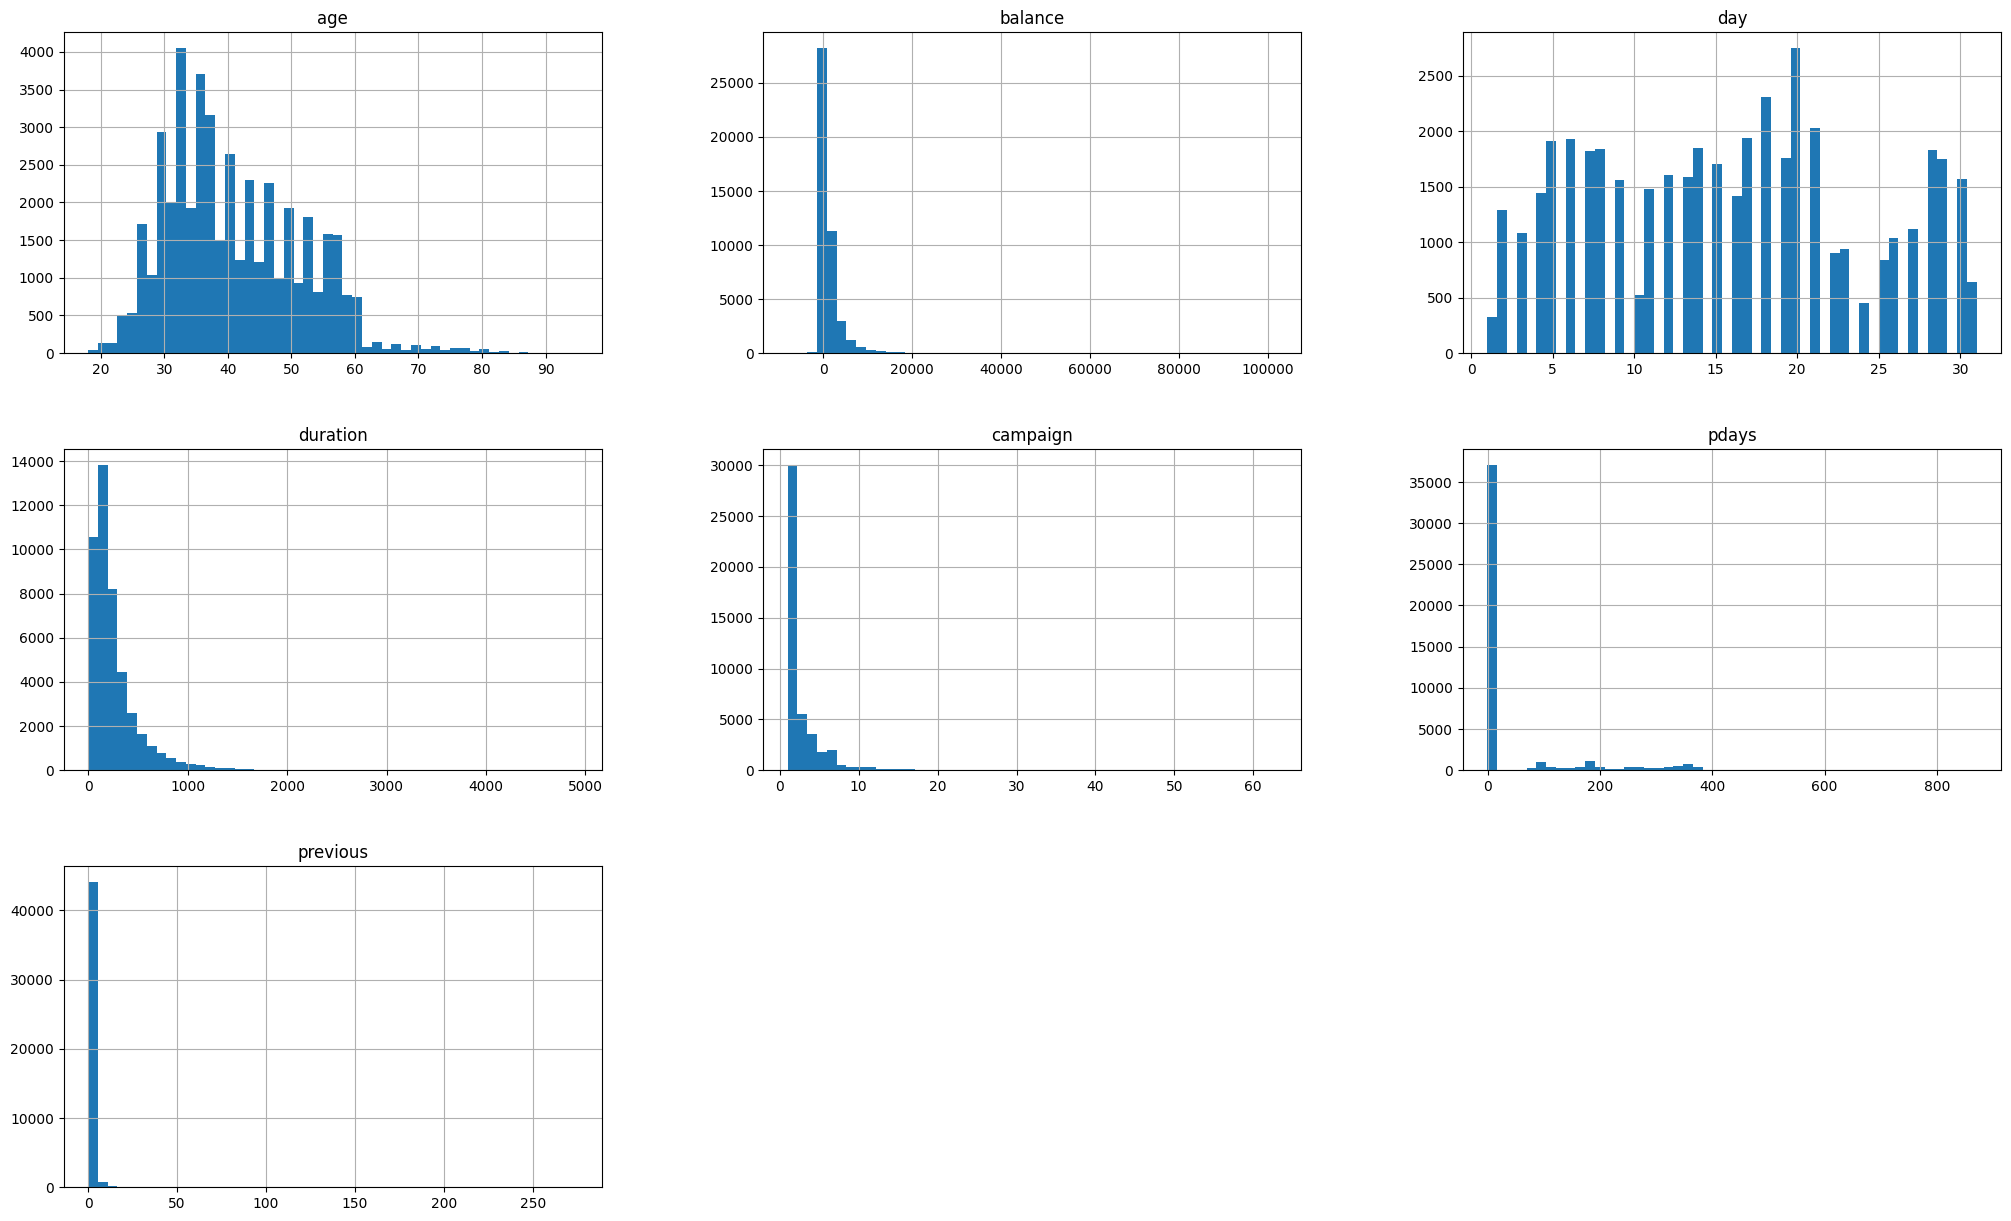

In [22]:
df.hist(bins=50,figsize=(25,15))
plt.show()

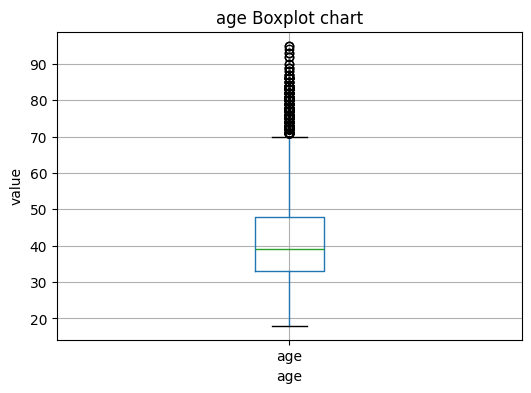

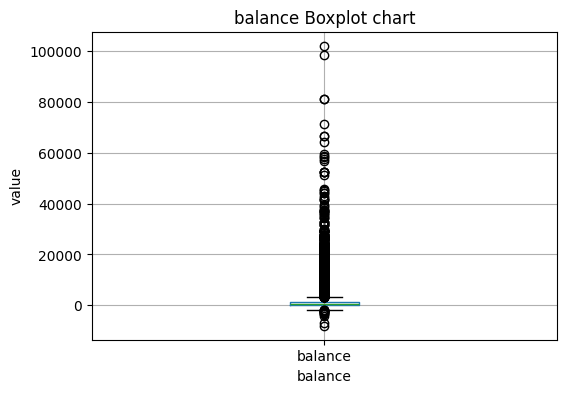

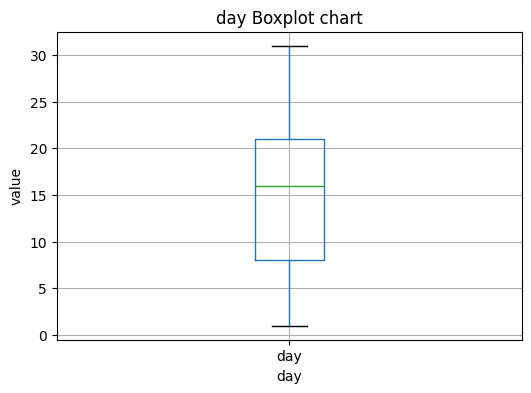

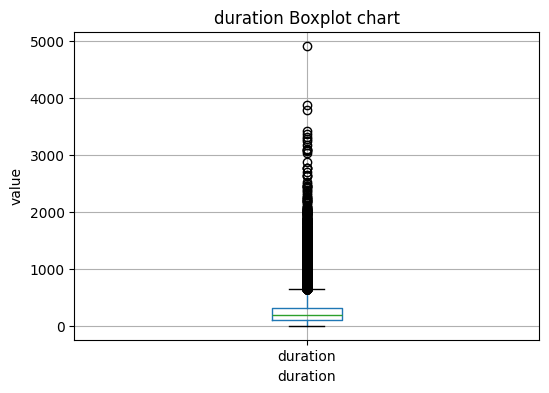

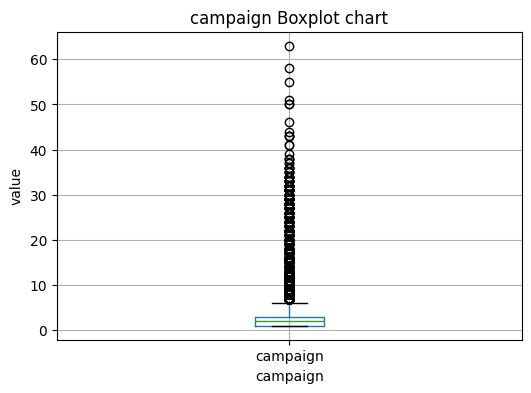

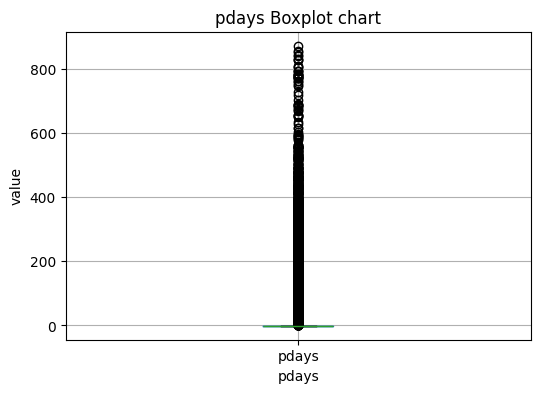

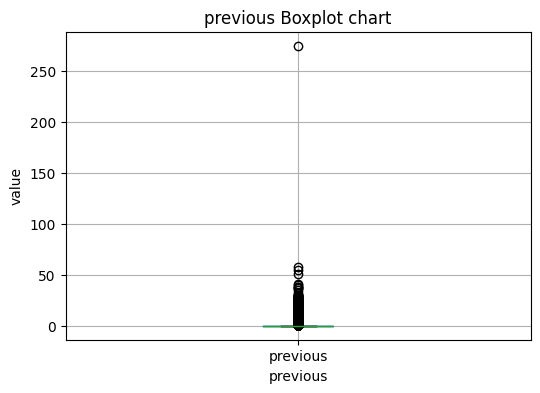

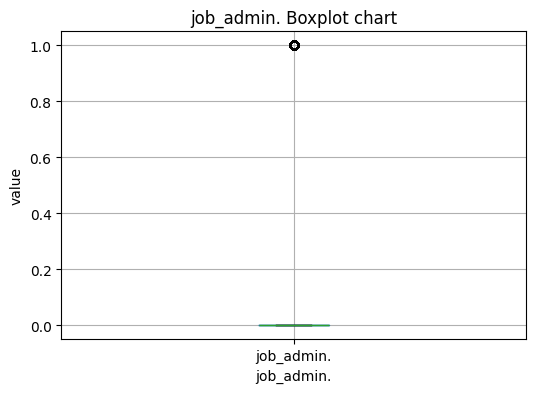

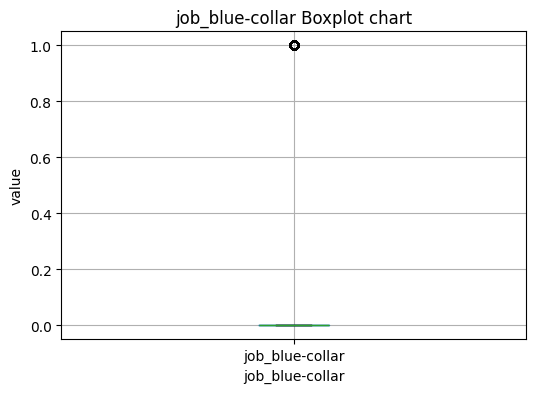

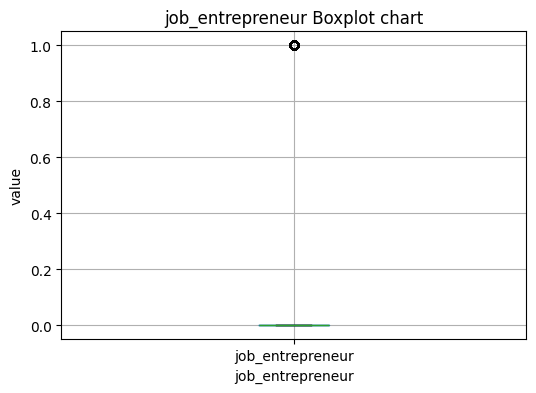

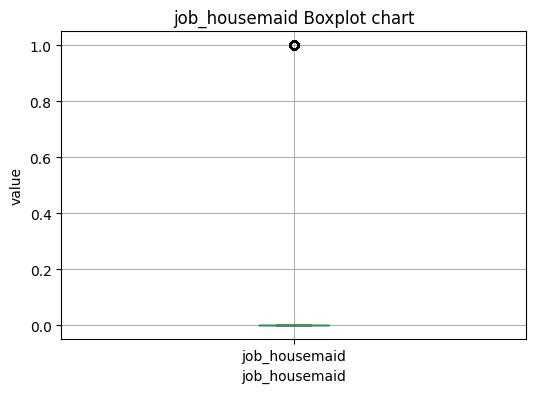

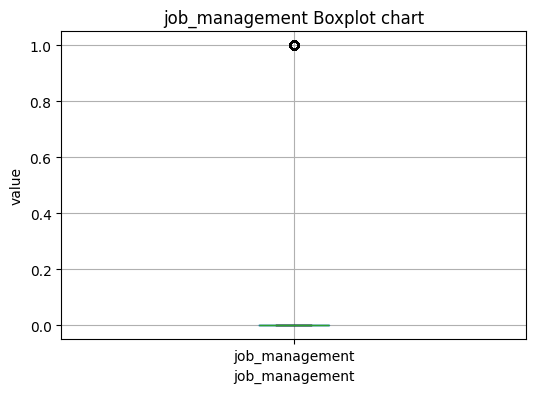

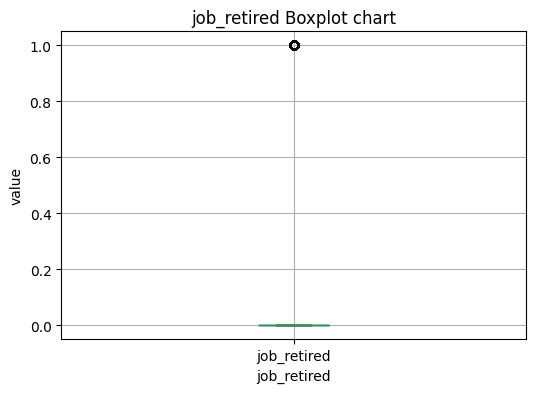

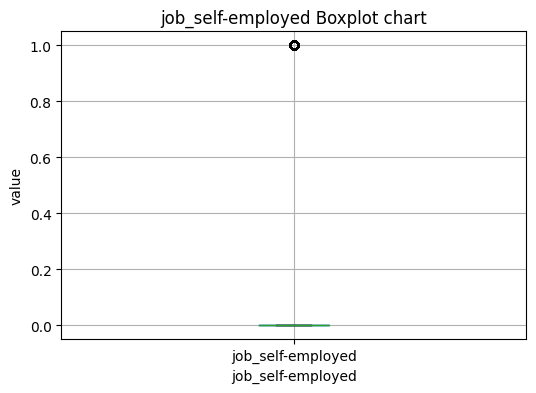

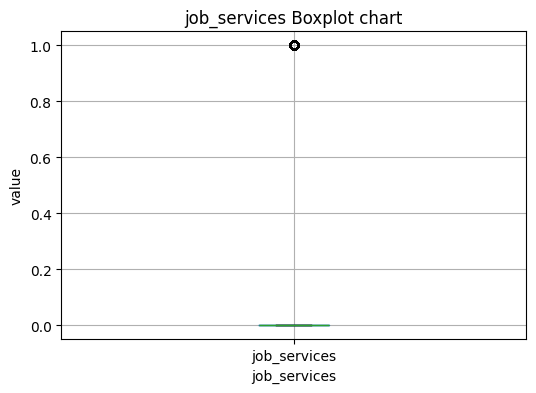

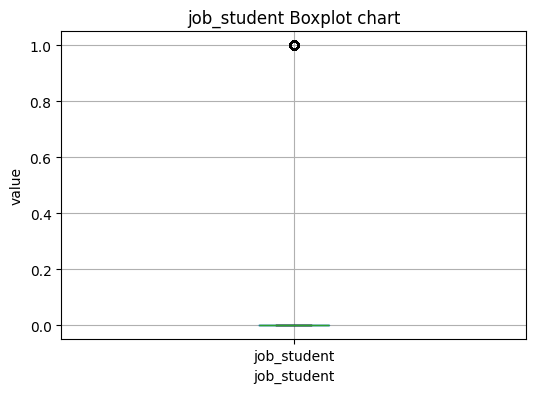

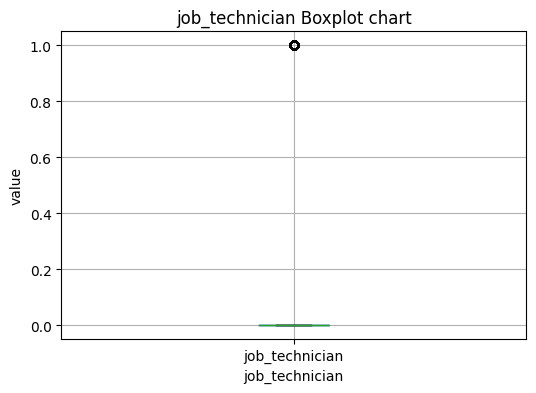

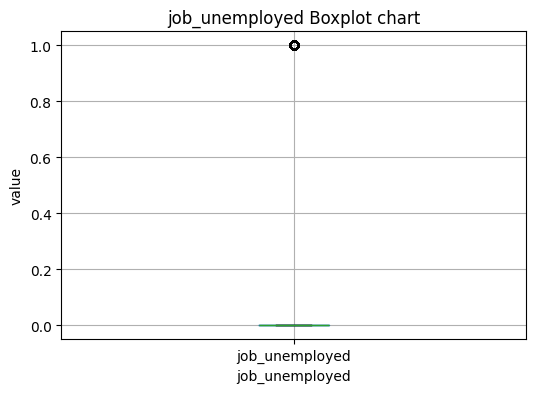

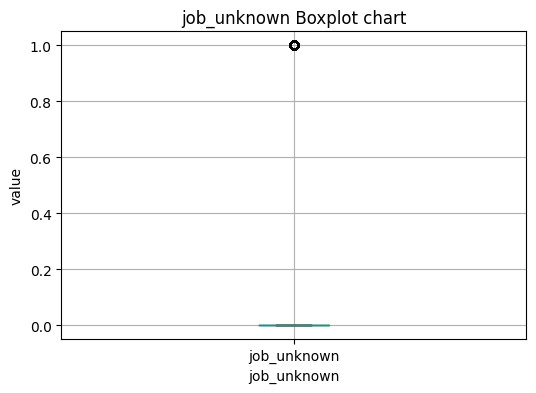

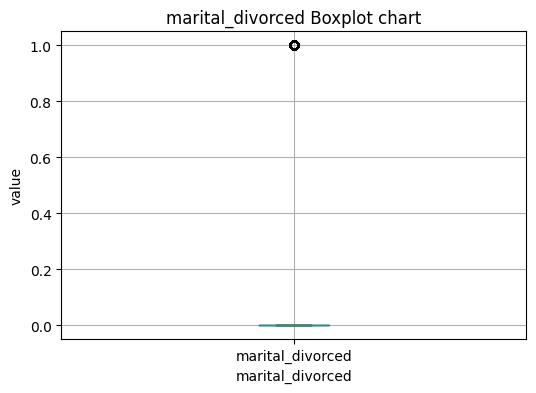

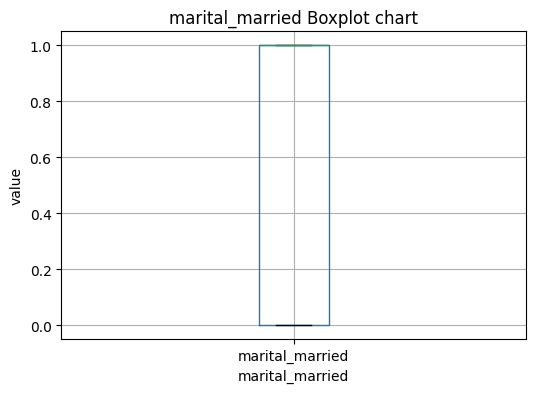

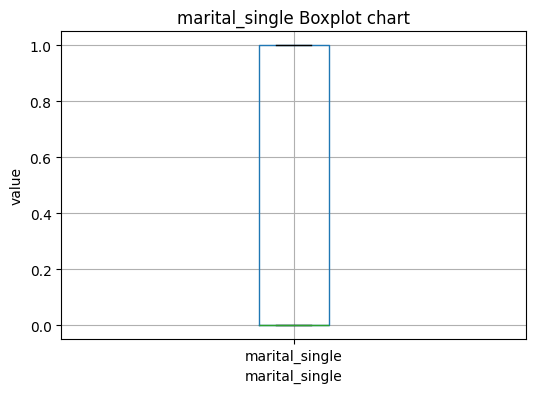

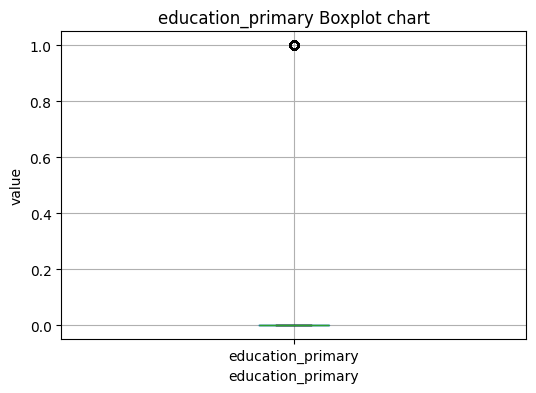

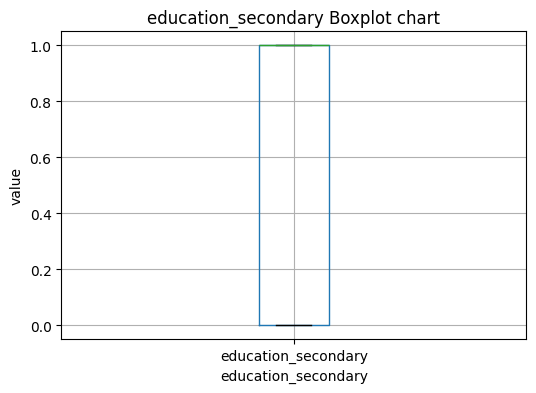

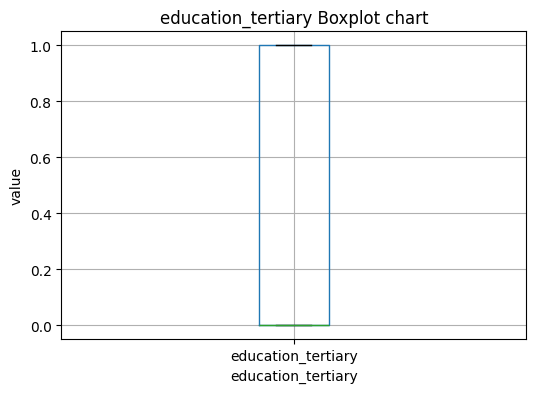

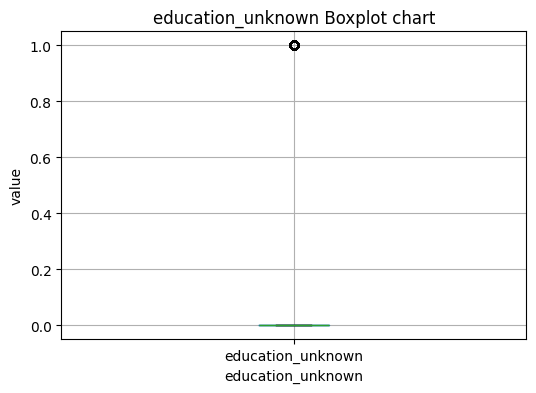

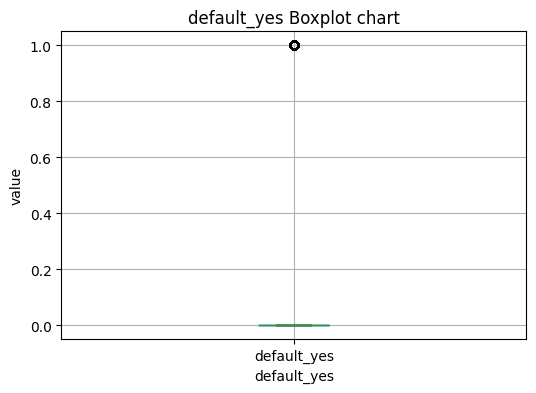

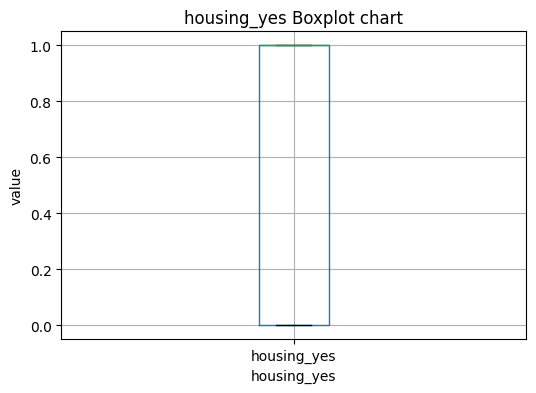

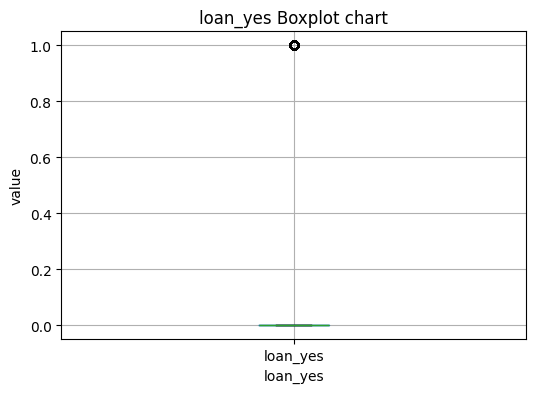

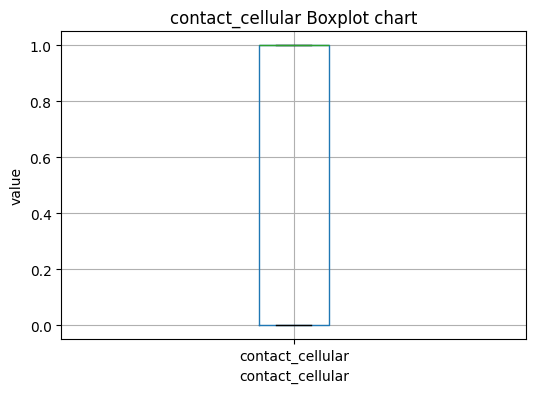

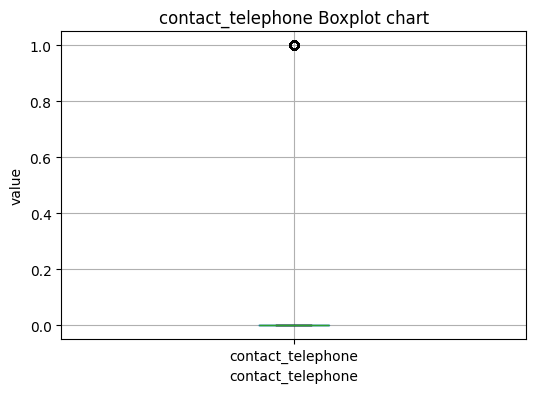

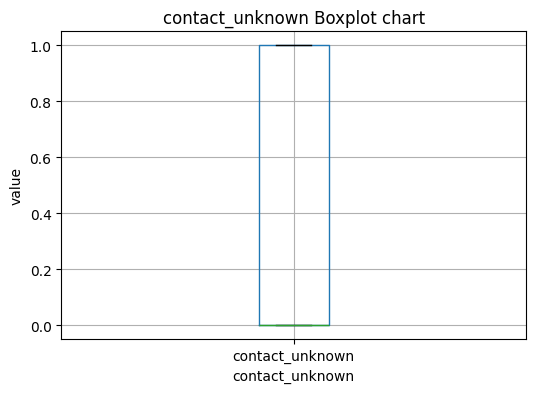

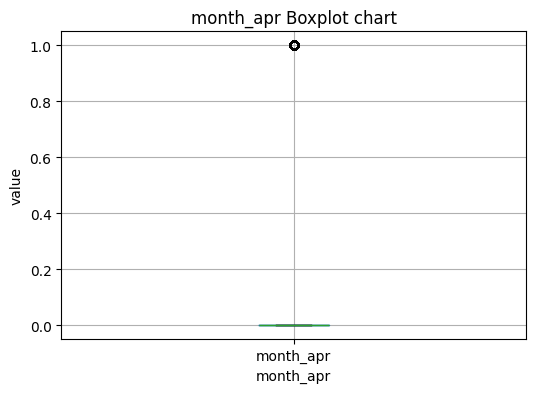

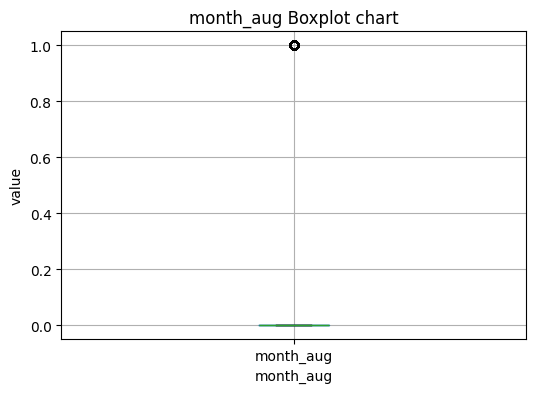

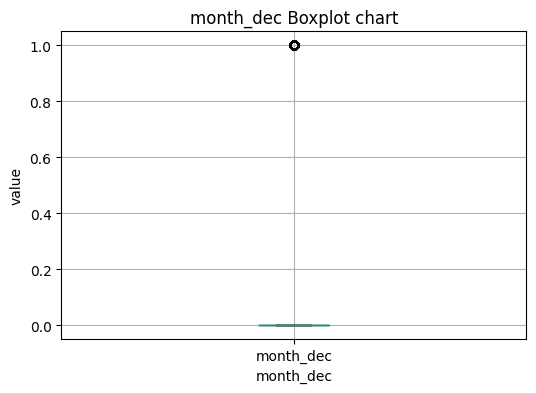

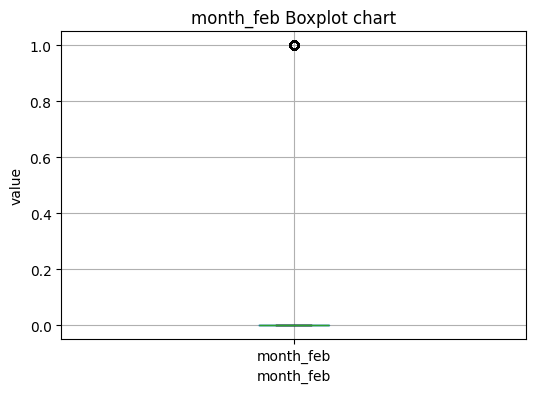

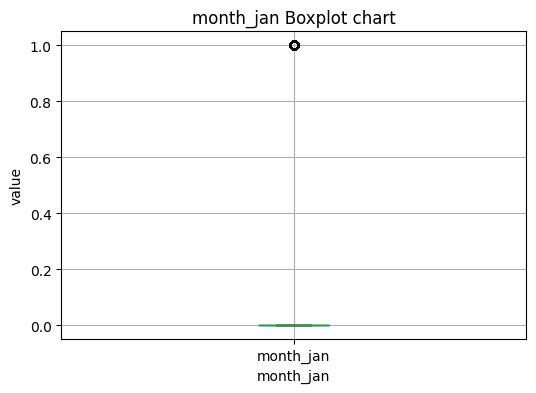

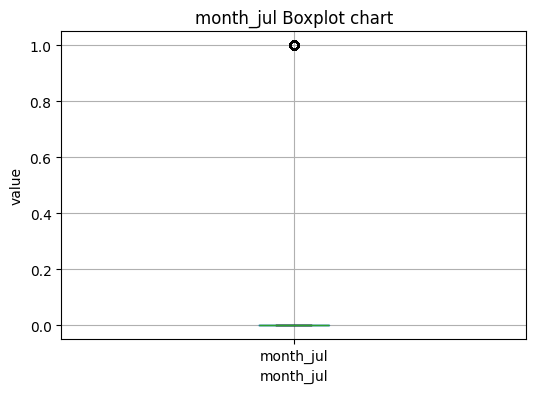

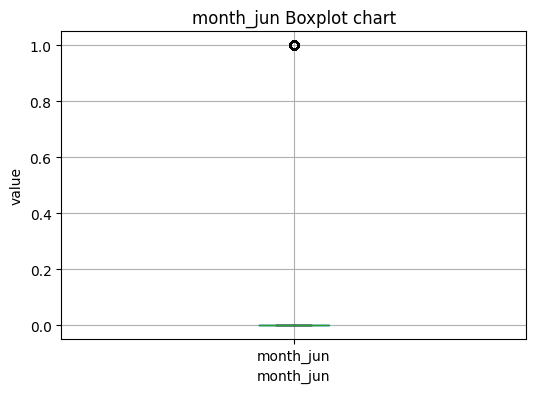

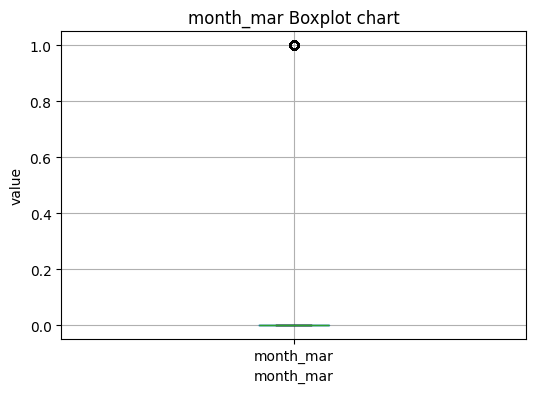

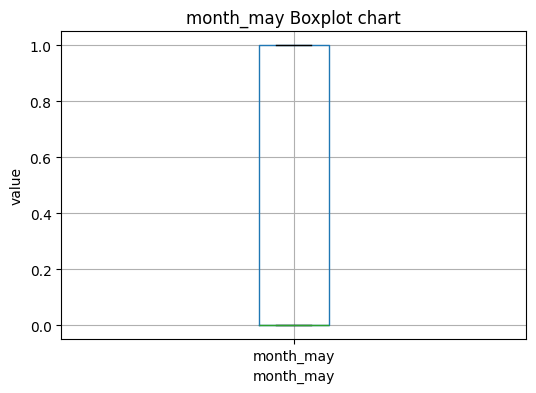

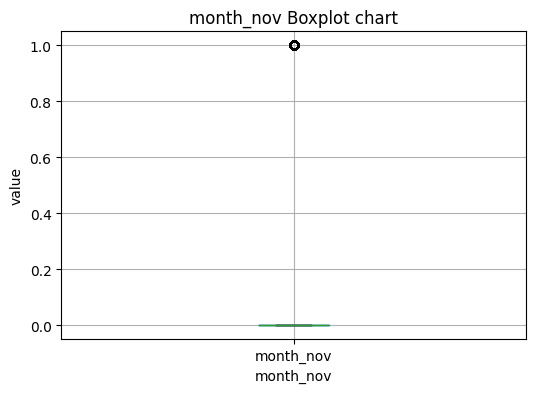

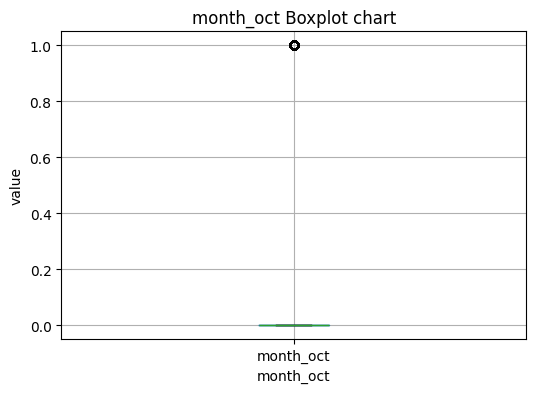

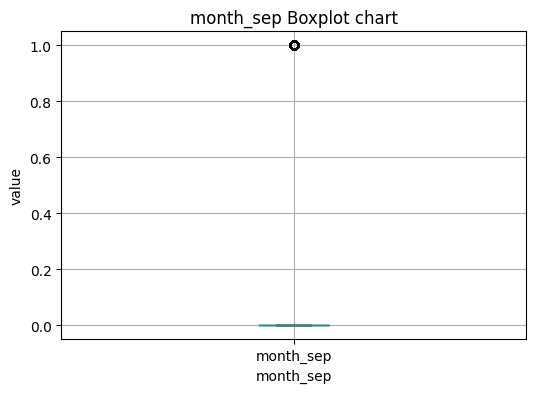

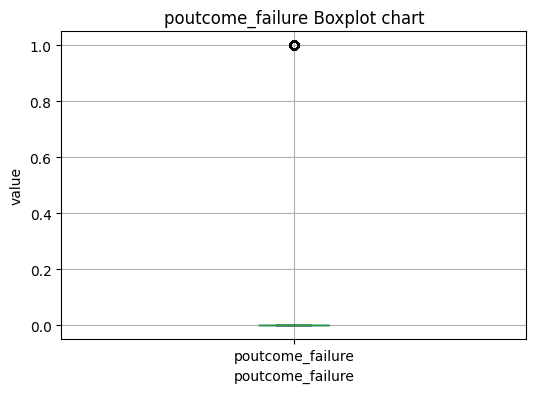

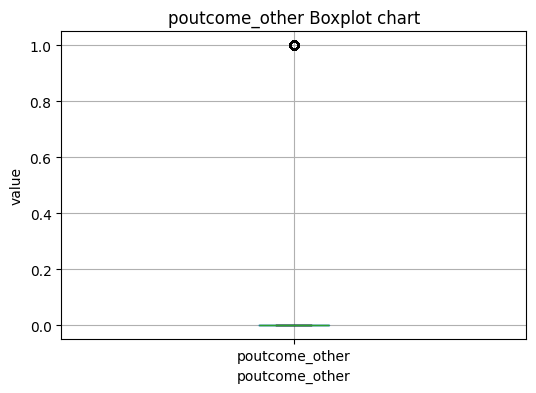

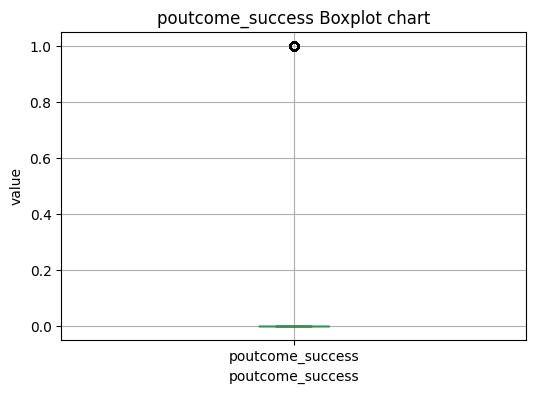

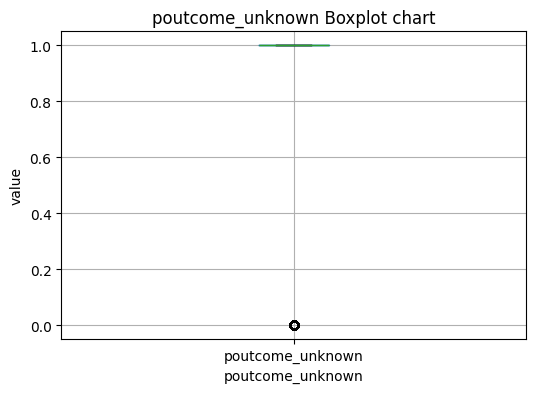

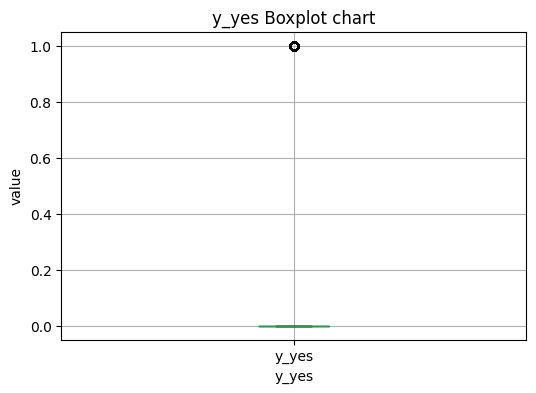

In [23]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f'{column} Boxplot chart')
    plt.xlabel(column)
    plt.ylabel('value')
    plt.show()

In [24]:
df=(df[df["age"]<70])

In [25]:
df=(df[df["age"]>18])

In [26]:
df=(df[df["balance"]<20000])

In [27]:
df=(df[df["campaign"]<15])

In [28]:
df=(df[df["pdays"]<400])

In [29]:
df=(df[df["duration"]<1800])

In [30]:
df=(df[df["previous"]<20])

In [31]:
corr_matrix=df.corr()
corr_matrix["y_yes"].sort_values()

poutcome_unknown      -0.154955
contact_unknown       -0.145967
housing_yes           -0.132493
month_may             -0.098299
campaign              -0.070935
job_blue-collar       -0.066011
marital_married       -0.063856
loan_yes              -0.063596
education_primary     -0.053675
month_jul             -0.033874
education_secondary   -0.032741
day                   -0.027565
job_services          -0.025630
default_yes           -0.020777
job_entrepreneur      -0.018719
job_housemaid         -0.015865
age                   -0.015611
month_nov             -0.014098
month_jan             -0.011104
month_jun             -0.010924
month_aug             -0.006986
job_technician        -0.003353
contact_telephone     -0.002307
marital_divorced      -0.001489
job_unknown            0.000086
job_self-employed      0.001416
poutcome_failure       0.001765
education_unknown      0.008527
job_admin.             0.010223
job_unemployed         0.021849
poutcome_other         0.029170
month_fe

In [32]:
sorted_corr=corr_matrix["y_yes"].sort_values()
filtered_corr = sorted_corr[(sorted_corr > 0.009) | (sorted_corr < -0.009)]
print(filtered_corr)

poutcome_unknown      -0.154955
contact_unknown       -0.145967
housing_yes           -0.132493
month_may             -0.098299
campaign              -0.070935
job_blue-collar       -0.066011
marital_married       -0.063856
loan_yes              -0.063596
education_primary     -0.053675
month_jul             -0.033874
education_secondary   -0.032741
day                   -0.027565
job_services          -0.025630
default_yes           -0.020777
job_entrepreneur      -0.018719
job_housemaid         -0.015865
age                   -0.015611
month_nov             -0.014098
month_jan             -0.011104
month_jun             -0.010924
job_admin.             0.010223
job_unemployed         0.021849
poutcome_other         0.029170
month_feb              0.034156
job_retired            0.037642
job_management         0.039829
balance                0.061001
month_apr              0.066392
marital_single         0.070304
month_dec              0.073401
education_tertiary     0.074209
job_stud

In [33]:
filtered_columns = filtered_corr.index.tolist()

df= df[filtered_columns]

df.head()

,poutcome_unknown,contact_unknown,housing_yes,month_may,campaign,job_blue-collar,marital_married,loan_yes,education_primary,month_jul,...,job_student,pdays,month_sep,previous,month_oct,month_mar,contact_cellular,poutcome_success,duration,y_yes
0,True,True,True,True,1,False,True,False,False,False,...,False,-1,False,0,False,False,False,False,261,False
1,True,True,True,True,1,False,False,False,False,False,...,False,-1,False,0,False,False,False,False,151,False
2,True,True,True,True,1,False,True,True,False,False,...,False,-1,False,0,False,False,False,False,76,False
3,True,True,True,True,1,True,True,False,False,False,...,False,-1,False,0,False,False,False,False,92,False
4,True,True,False,True,1,False,False,False,False,False,...,False,-1,False,0,False,False,False,False,198,False


In [34]:
X = df.drop("y_yes", axis=1)
y = df["y_yes"]

In [35]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.utils import parallel_backend
cc = ClusterCentroids(random_state=42)
with parallel_backend('threading', n_jobs=-1):
    x_resampled, y_resampled = cc.fit_resample(X, y)

In [36]:
x_resampled.shape, y_resampled.shape

((9664, 40), (9664,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7731, 40), (1933, 40), (7731,), (1933,))

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [43]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.91722710812209

In [44]:
xgb_params = {
       'colsample_bytree': [0.6,0.8,0.9], 
     'n_estimators':[1000,1200,1400],
     'max_depth': [6,7,8],
     'learning_rate': [0.05, 0.1, 0.2]}

In [45]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [46]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 0.9],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [1000, 1200, 1400]},
             verbose=2)

In [47]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 1000}

In [48]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 7,
                    colsample_bytree = 0.8,
                    n_estimators = 1000)

In [49]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [50]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9203310915675117